In [1]:
# import sys
# !{sys.executable} -m pip install torch==1.9.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

from model import QNetwork
from collections import deque
import numpy as np
import torch

In [2]:
from unityagents import UnityEnvironment

In [3]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [6]:
def dqn(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if np.mean(scores_window) > 13:
            print('\r\rEnvironment solved in {} episodes!'.format(i_episode))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint-{}.pth'.format(i_episode))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
        if i_episode % 100 == 0:
            print('\r\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint-{}.pth'.format(i_episode))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

    return scores




In [7]:
from dqn_agent import Agent
from double_dqn_agent import DoubleDQNAgent
from per_agent import PERAgent
from dueling_dqn_agent import DuelingDQNAgent
from rainbow_agent import RainbowAgent
print("Starting training with a vanilla DQN agent: ")
dqn_scores = dqn(Agent(state_size=37, action_size=4, seed=0))
print("Starting training with a Double DQN agent: ")
double_dqn_scores = dqn(DoubleDQNAgent(state_size=37, action_size=4, seed=0))
print("Starting training with a Prioritized Experience Replay agent: ")
per_scores = dqn(PERAgent(state_size=37, action_size=4, seed=0))
print("Starting training with a Dueling DQN agent: ")
dueling_dqn_agent = dqn(PERAgent(state_size=37, action_size=4, seed=0))
print("Starting training with all-mixed-strategies agent (Rainbow): ")
rainbow_scores = dqn(RainbowAgent(state_size=37, action_size=4, seed=0))

Starting training with a vanilla DQN agent: 
Episode 100	Average Score: 0.45
Episode 200	Average Score: 3.00
Episode 300	Average Score: 6.04
Episode 400	Average Score: 9.60
Episode 500	Average Score: 12.80
Environment solved in 516 episodes!
Starting training with a Double DQN agent: 
Episode 100	Average Score: 0.24
Episode 200	Average Score: 1.44
Episode 300	Average Score: 4.94
Episode 400	Average Score: 9.15
Episode 500	Average Score: 12.34
Environment solved in 525 episodes!
Starting training with a Prioritized Experience Replay agent: 
Episode 100	Average Score: 0.27
Episode 200	Average Score: 1.80
Episode 300	Average Score: 1.77
Episode 400	Average Score: 3.33
Episode 500	Average Score: 6.31
Episode 600	Average Score: 8.64
Episode 700	Average Score: 7.07
Episode 800	Average Score: 7.37
Episode 900	Average Score: 11.65
Environment solved in 932 episodes!
Starting training with a Dueling DQN agent: 
Episode 100	Average Score: 0.33
Episode 200	Average Score: 2.05
Episode 300	Average 

NameError: name 'scores' is not defined

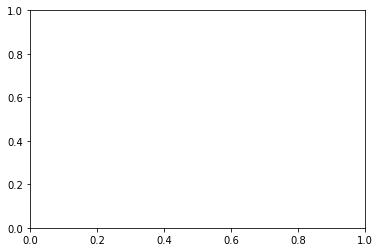

In [8]:
import matplotlib.pyplot as plt

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
agent.qnetwork_local.eval()

score = 0
episodes = 100                      
for i in range(episodes): 
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state

    while True:
        action = agent.act(state)                      # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
            
    print("Episode: {}, Score: {}".format(i+1, score/(i+1)))
    
print("Score: {}".format(score/episodes))

In [ ]:
env.close()

In [ ]:
import numpy as np

priorities = np.array([0.5, 0.7, 0.9])
priorities

In [ ]:
input = [2.5, 5]

suma = sum(input)

print([i/suma for i in input])